# 1. Data Cleaning & Preprocessing
## 1.1 Import Libraries and Load Data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "data/Hospital.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, 0 to 1210
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrganisationID      1211 non-null   int64  
 1   OrganisationCode    1211 non-null   object 
 2   OrganisationType    1211 non-null   object 
 3   SubType             1211 non-null   object 
 4   Sector              1211 non-null   object 
 5   OrganisationStatus  1211 non-null   object 
 6   IsPimsManaged       1211 non-null   bool   
 7   OrganisationName    1211 non-null   object 
 8   Address1            883 non-null    object 
 9   Address2            727 non-null    object 
 10  Address3            147 non-null    object 
 11  City                1196 non-null   object 
 12  County              973 non-null    object 
 13  Postcode            1210 non-null   object 
 14  Latitude            1209 non-null   float64
 15  Longitude           1209 non-null   float64
 16  ParentODSCo

,OrganisationID,OrganisationCode,OrganisationType,SubType,Sector,OrganisationStatus,IsPimsManaged,OrganisationName,Address1,Address2,...,County,Postcode,Latitude,Longitude,ParentODSCode,ParentName,Phone,Email,Website,"Fax,,,"
0,17970,NDA07,Hospital,Hospital,Independent Sector,Visible,True,Walton Community Hospital - Virgin Care Servic...,NaN,Rodney Road,...,Surrey,KT12 3LD,51.379997,-0.406042,NDA,Virgin Care Services Ltd,01932 414205,NaN,NaN,"01932 253674,,,"
1,17981,NDA18,Hospital,Hospital,Independent Sector,Visible,True,Woking Community Hospital (Virgin Care),NaN,Heathside Road,...,Surrey,GU22 7HS,51.315132,-0.556289,NDA,Virgin Care Services Ltd,01483 715911,NaN,NaN,",,,"
2,18102,NLT02,Hospital,Hospital,NHS Sector,Visible,True,North Somerset Community Hospital,North Somerset Community Hospital,Old Street,...,Avon,BS21 6BS,51.437195,-2.847193,NLT,North Somerset Community Partnership Community...,01275 872212,NaN,http://www.nscphealth.co.uk,",,,"
3,18138,NMP01,Hospital,Hospital,Independent Sector,Visible,False,Bridgewater Hospital,120 Princess Road,NaN,...,Greater Manchester,M15 5AT,53.459743,-2.245469,NMP,Bridgewater Hospital (Manchester) Ltd,0161 2270000,NaN,www.bridgewaterhospital.com,",,,"
4,18142,NMV01,Hospital,Hospital,Independent Sector,Visible,True,Kneesworth House,Old North Road,Bassingbourn,...,NaN,SG8 5JP,52.078121,-0.030604,NMV,Partnerships In Care Ltd,01763 255 700,reception_kneesworthhouse@partnershipsincare.c...,www.partnershipsincare.co.uk,",,,"


## 1.2 Check for Missing Values

In [56]:
# Count missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

# Display missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

#number of ,,, in Fax,,,
print(df['Fax,,,'].str.strip().str.cat(sep='').count(',,,'))

           Missing Values  Percentage
Address3             1064   87.861272
Email                 789   65.152766
Address2              484   39.966969
Website               358   29.562345
Address1              328   27.085054
Phone                 250   20.644096
County                238   19.653179
City                   15    1.238646
Longitude               2    0.165153
Latitude                2    0.165153
Fax,,,                  2    0.165153
Postcode                1    0.082576
1154


## 1.3 Handle Missing Values

In [6]:
# Drop columns with excessive missing values
columns_to_drop = ['Address3', 'Fax,,,']
df.drop(columns=columns_to_drop, inplace=True)

# Fill missing values for categorical data with 'Unknown'
categorical_columns = ['Address1', 'Address2', 'City', 'County']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Fill missing numerical values with median
df['Latitude'].fillna(df['Latitude'].median(), inplace=True)
df['Longitude'].fillna(df['Longitude'].median(), inplace=True)


C:\Users\Nathan\AppData\Local\Temp\ipykernel_24308\3315882235.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].median(), inplace=True)
C:\Users\Nathan\AppData\Local\Temp\ipykernel_24308\3315882235.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

## 1.4 Check for Duplicates and Remove Them

In [8]:
# Count and remove duplicate rows
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

print(f"Removed {duplicates} duplicate rows.")


Removed 0 duplicate rows.


## 1.5 Standardize Phone and Website Formats

In [10]:
# Remove spaces and standardize phone numbers
df['Phone'] = df['Phone'].str.replace(r'\s+', '', regex=True)

# Ensure website URLs are properly formatted
df['Website'] = df['Website'].apply(lambda x: x if isinstance(x, str) and x.startswith('http') else 'Unknown')


## 1.6 Save the cleanned data

In [12]:
text_columns = df.columns

# Save the cleaned data
cleaned_file_path = "Cleaned_Hospital.csv"
df.to_csv(cleaned_file_path, index=False)

# 2. Exploratory Data Analysis (EDA)
## 2.1 Distribution of Hospital Types

C:\Users\Nathan\AppData\Local\Temp\ipykernel_24308\2041753744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='OrganisationType', order=df['OrganisationType'].value_counts().index, palette='viridis')


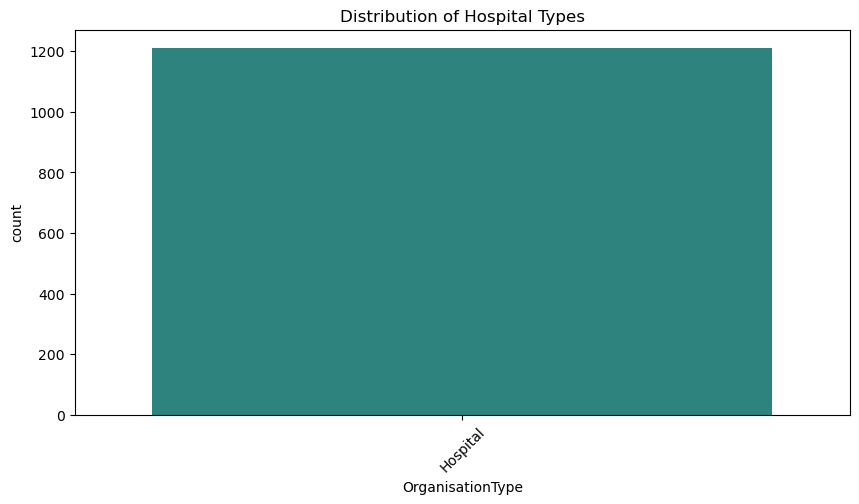

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='OrganisationType', order=df['OrganisationType'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribution of Hospital Types")
plt.show()


C:\Users\Nathan\AppData\Local\Temp\ipykernel_24308\1658977686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SubType', order=df['SubType'].value_counts().index, palette='viridis')


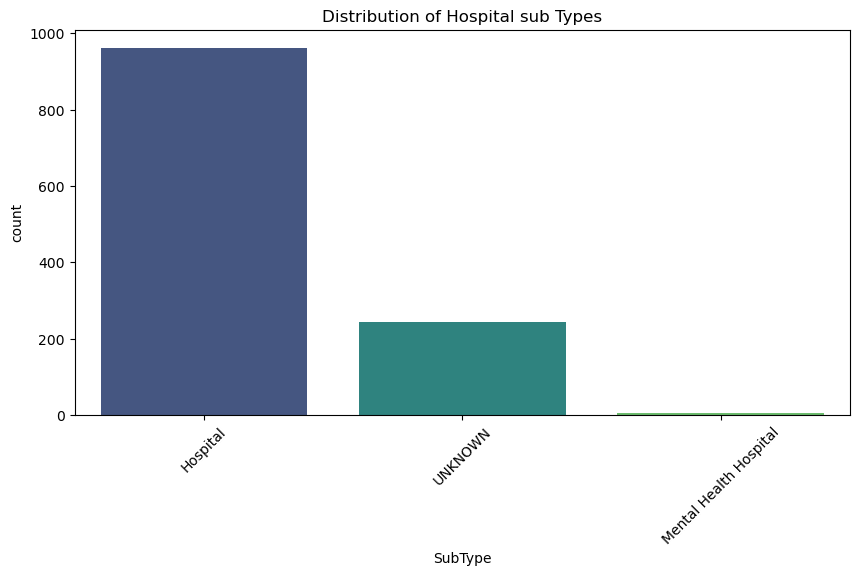

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='SubType', order=df['SubType'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribution of Hospital sub Types")
plt.show()


## 2.2 Geographic Distribution of Hospitals

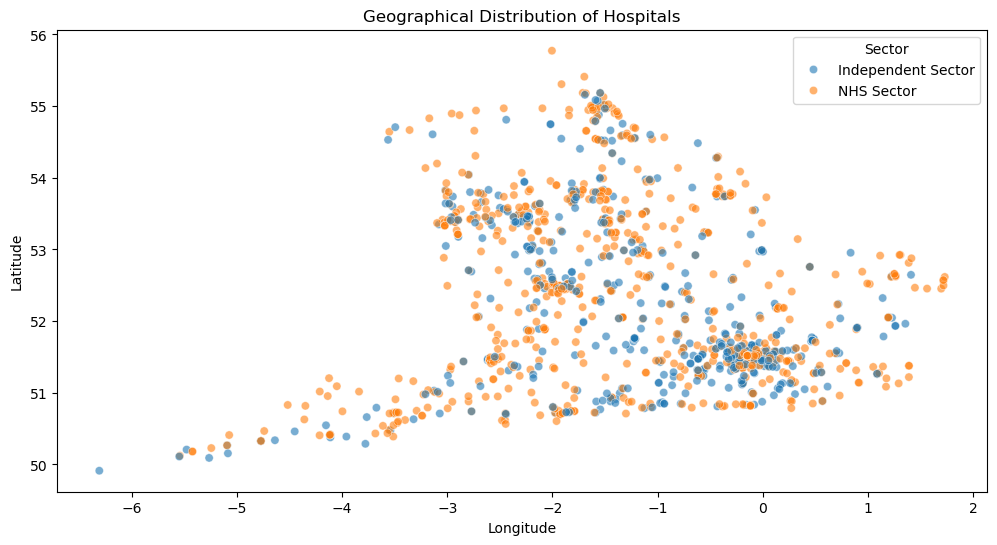

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Sector', alpha=0.6)
plt.title("Geographical Distribution of Hospitals")
plt.show()


## 2.3 Top 10 Cities with the Most Hospitals

C:\Users\Nathan\AppData\Local\Temp\ipykernel_24308\2186343536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")


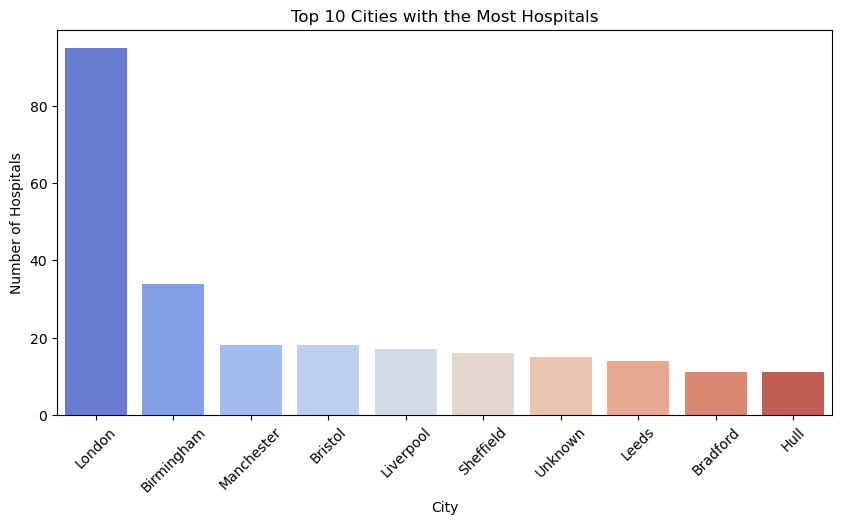

In [19]:
top_cities = df['City'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Cities with the Most Hospitals")
plt.ylabel("Number of Hospitals")
plt.show()


## 2.4 Public vs Private Hospitals

C:\Users\Nathan\AppData\Local\Temp\ipykernel_24308\2916519033.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sector', palette='Set2')


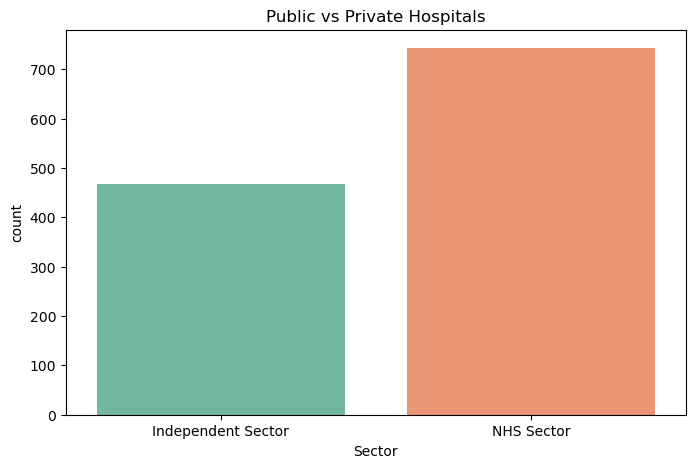

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sector', palette='Set2')
plt.title("Public vs Private Hospitals")
plt.show()


# 3. Advanced Data Analysis
## 3.1 Number of Hospitals by Region (City, County)

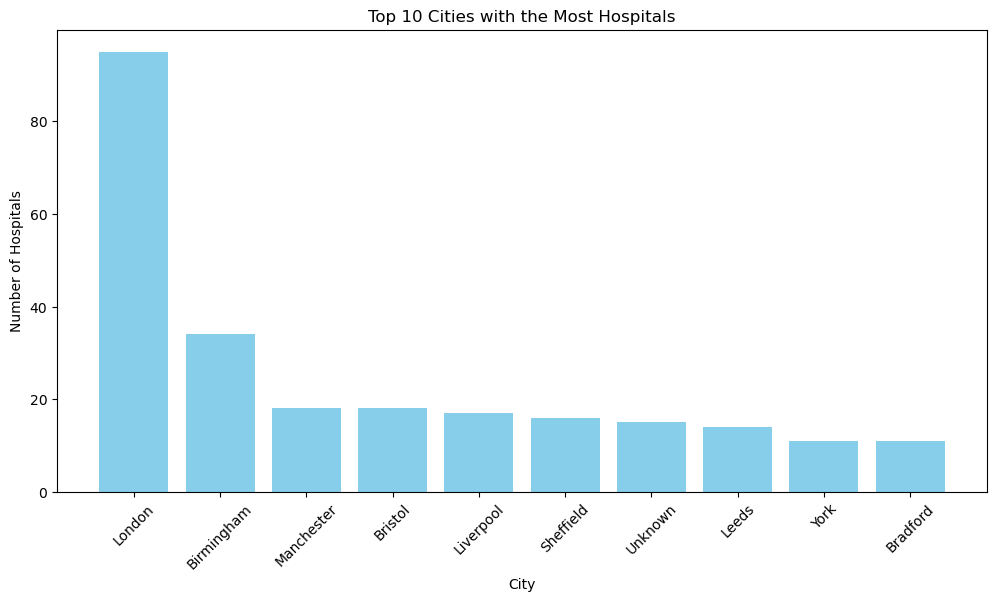

In [23]:
# Aggregate data for Power BI
hospitals_by_city = df.groupby('City').size().reset_index(name='Hospital Count')
hospitals_by_county = df.groupby('County').size().reset_index(name='Hospital Count')

# Save for Power BI
hospitals_by_city.to_csv("hospitals_by_city.csv", index=False)
hospitals_by_county.to_csv("hospitals_by_county.csv", index=False)

# Optional: Matplotlib validation
plt.figure(figsize=(12, 6))
top_cities = hospitals_by_city.sort_values(by="Hospital Count", ascending=False).head(10)
plt.bar(top_cities['City'], top_cities['Hospital Count'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 10 Cities with the Most Hospitals")
plt.xlabel("City")
plt.ylabel("Number of Hospitals")
plt.show()

## 3.2 Percentage of Hospitals Managed by NHS vs Independent Sector

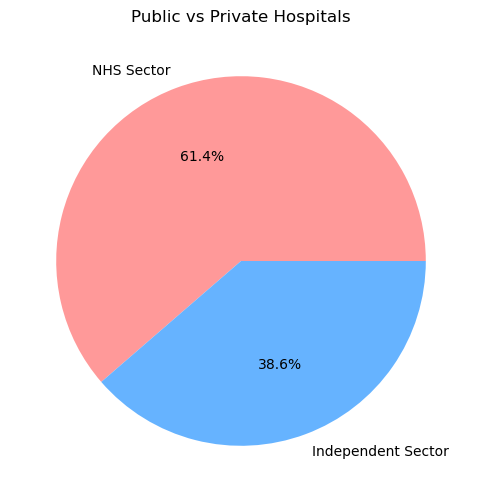

In [25]:
# Aggregation for Power BI
sector_distribution = df['Sector'].value_counts(normalize=True).reset_index()
sector_distribution.columns = ['Sector', 'Percentage']

# Save for Power BI
sector_distribution.to_csv("sector_distribution.csv", index=False)

# Optional: Matplotlib validation
plt.figure(figsize=(6, 6))
plt.pie(sector_distribution['Percentage'], labels=sector_distribution['Sector'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Public vs Private Hospitals")
plt.show()


## 3.3 Parent Organization Influence on Hospital Distribution

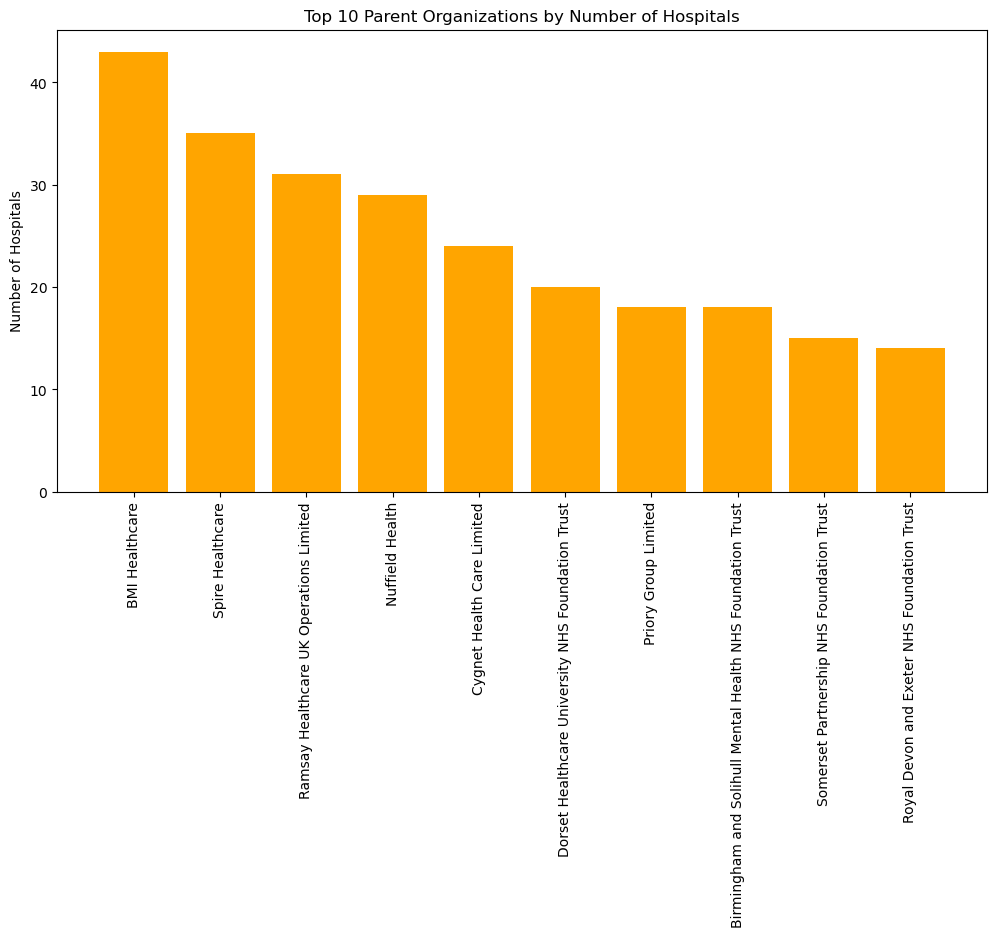

In [27]:
# Count hospitals per parent organization
parent_distribution = df.groupby('ParentName').size().reset_index(name='Hospital Count')

# Save for Power BI
parent_distribution.to_csv("parent_distribution.csv", index=False)

# Optional: Matplotlib validation
plt.figure(figsize=(12, 6))
top_parents = parent_distribution.sort_values(by="Hospital Count", ascending=False).head(10)
plt.bar(top_parents['ParentName'], top_parents['Hospital Count'], color='orange')
plt.xticks(rotation=90)
plt.title("Top 10 Parent Organizations by Number of Hospitals")
plt.ylabel("Number of Hospitals")
plt.show()


## 3.4 Completeness of Contact Information

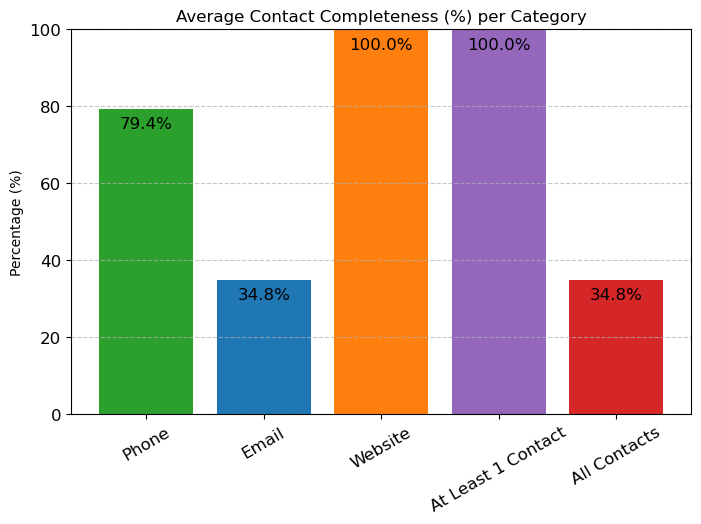

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Define completeness per OrganisationCode
contact_completeness = df[['OrganisationCode', 'Phone', 'Email', 'Website']].copy()

# Convert to boolean (1 if not null, 0 if null)
contact_completeness['Has_Phone'] = contact_completeness['Phone'].notna().astype(int)
contact_completeness['Has_Email'] = contact_completeness['Email'].notna().astype(int)
contact_completeness['Has_Website'] = contact_completeness['Website'].notna().astype(int)

# Calculate individual completeness percentages
contact_completeness['Phone Completeness (%)'] = contact_completeness['Has_Phone'] * 100
contact_completeness['Email Completeness (%)'] = contact_completeness['Has_Email'] * 100
contact_completeness['Website Completeness (%)'] = contact_completeness['Has_Website'] * 100

# Calculate completeness for at least 1 contact
contact_completeness['At Least 1 Contact (%)'] = contact_completeness[['Has_Phone', 'Has_Email', 'Has_Website']].max(axis=1) * 100

# Calculate completeness for all contacts available
contact_completeness['All Contacts (%)'] = contact_completeness[['Has_Phone', 'Has_Email', 'Has_Website']].min(axis=1) * 100

# Keep only relevant columns
contact_completeness = contact_completeness[['OrganisationCode', 
                                             'Phone Completeness (%)', 
                                             'Email Completeness (%)', 
                                             'Website Completeness (%)', 
                                             'At Least 1 Contact (%)', 
                                             'All Contacts (%)']].drop_duplicates()

# Save for Power BI
contact_completeness.to_csv("contact_completeness.csv", index=False)

# Matplotlib Visualization: Stacked Bar Chart
plt.figure(figsize=(8, 5))
categories = ['Phone', 'Email', 'Website', 'At Least 1 Contact', 'All Contacts']
percentages = [
    contact_completeness['Phone Completeness (%)'].mean(),
    contact_completeness['Email Completeness (%)'].mean(),
    contact_completeness['Website Completeness (%)'].mean(),
    contact_completeness['At Least 1 Contact (%)'].mean(),
    contact_completeness['All Contacts (%)'].mean()
]

bars = plt.bar(categories, percentages, color=['#2ca02c', '#1f77b4', '#ff7f0e', '#9467bd', '#d62728'])

# Add percentage labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval-5, f"{yval:.1f}%", ha='center', fontsize=12)

plt.title("Average Contact Completeness (%) per Category")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## 3.5 Geographic Coverage - Number of Hospitals per Latitude/Longitude

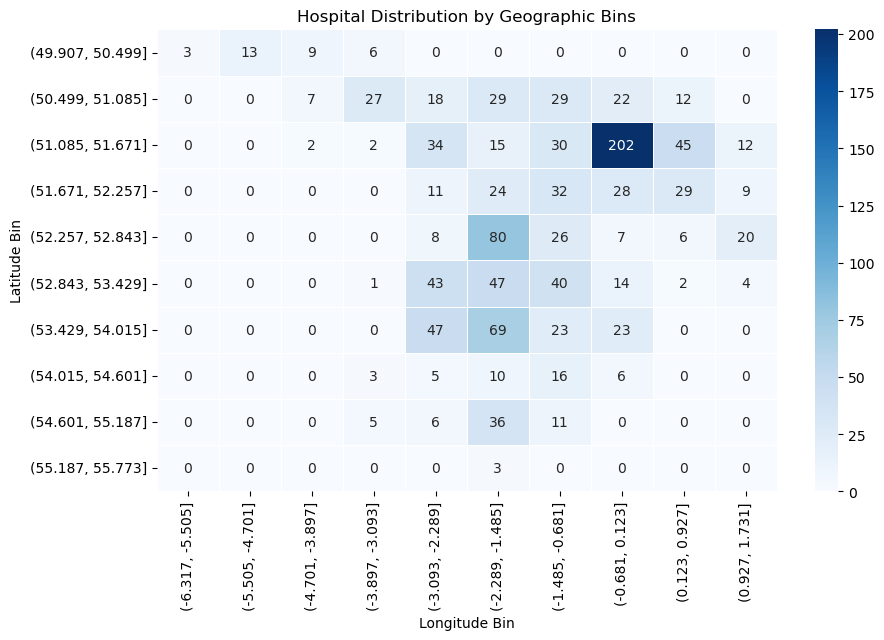

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Binning latitude and longitude to create regional clusters
df['Latitude_bin'] = pd.cut(df['Latitude'], bins=10)
df['Longitude_bin'] = pd.cut(df['Longitude'], bins=10)

# Aggregate data
geo_distribution = df.groupby(['Latitude_bin', 'Longitude_bin'], observed=False).size().reset_index(name='Hospital Count')

# Save for Power BI
geo_distribution.to_csv("geo_distribution.csv", index=False)

# Optional: Matplotlib validation (Heatmap)
plt.figure(figsize=(10, 6))

# Fix pivot table syntax
pivot_table = geo_distribution.pivot(index="Latitude_bin", columns="Longitude_bin", values="Hospital Count")

# Handle missing values by filling NaNs with 0
pivot_table = pivot_table.fillna(0)

# Plot heatmap
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Hospital Distribution by Geographic Bins")
plt.xlabel("Longitude Bin")
plt.ylabel("Latitude Bin")
plt.show()

